## Objective - Create a Simple Neural Network

X_train.shape (1347, 64)
y_train.shape (1347, 10)
X_test.shape (450, 64)
y_test.shape (450, 10)


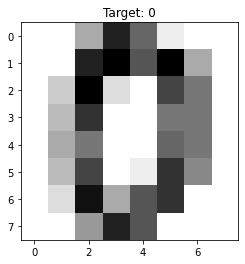

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = load_digits()
data = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)

image_sample = data[0].reshape(8, 8)

plt.imshow(image_sample, cmap='binary')
plt.title(f'Target: {target[0]}')

# Change target variables for neural network.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train.shape {X_train.shape}')
print(f'y_train.shape {y_train.shape}')
print(f'X_test.shape {X_test.shape}')
print(f'y_test.shape {y_test.shape}')

#### Create Model

In [5]:
def model():
    
    model = Sequential()
    model.add(Dense(50, input_shape=(64,)))
    model.add(Dense(50))
    model.add(Dense(50))
    model.add(Dense(50))
    model.add(Dense(10, activation='sigmoid'))    # Output layer, units must be the same as len(np.unique(target))
    
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model()

results = model.fit(X_train, y_train, validation_split=0.75)

11/11 [==============================] - 0s 25ms/step - loss: 2.4067 - accuracy: 0.0714 - val_loss: 2.3266 - val_accuracy: 0.0742
